## Predicting Sea Level Rise Using Time Series Analysis and Machine Learning, and its Impact on Global Economy
### Author: Hermann J Fan

### Feature Importance Analysis:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and inspect the dataset
data = pd.read_csv('data/nysealevel.csv')
print("Initial Dataset:")
print(data.info())

# Step 2: Handle missing values (drop rows with missing FLD_ZONE for simplicity)
data = data.dropna(subset=['FLD_ZONE'])
data['FLD_ZONE'] = data['FLD_ZONE'].astype('category').cat.codes  # Encode categorical flood zones to numeric

Initial Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7055 entries, 0 to 7054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    7055 non-null   object 
 1   GRIDCODE    7055 non-null   int64  
 2   Join_Count  7055 non-null   int64  
 3   FLD_ZONE    4283 non-null   object 
 4   STATIC_BFE  7055 non-null   int64  
 5   ABFE_0_2Pc  7055 non-null   int64  
 6   Shape_Leng  7055 non-null   float64
 7   Shape_Area  7055 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 441.1+ KB
None


In [2]:
# Drop irrelevant or non-numeric columns (e.g., 'the_geom')
X = data.drop(['the_geom', 'FLD_ZONE'], axis=1)
y = data['FLD_ZONE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9652656158785756
Test Accuracy: 0.9556592765460911

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       551
           1       1.00      1.00      1.00         7
           2       0.97      0.90      0.93       299

    accuracy                           0.96       857
   macro avg       0.97      0.96      0.97       857
weighted avg       0.96      0.96      0.96       857



- The model achieves a training accuracy of approximately 96.5% and a test accuracy of 95.6%, indicating good generalization and minimal overfitting.
- The precision, recall, and F1-scores for each class (0, 1, 2) provide deeper insights into the model’s ability to distinguish between classes:
  - Class 0 (Flood Zone AE): High recall (0.99) and precision (0.95) indicate the model performs well in identifying and predicting this zone.
  - Class 1 (Flood Zone AO): Perfect recall and precision suggest excellent model performance for this rare class.
  - Class 2 (Flood Zone VE): Slightly lower recall (0.90) compared to the other classes suggests room for improvement in detecting high-hazard coastal areas.

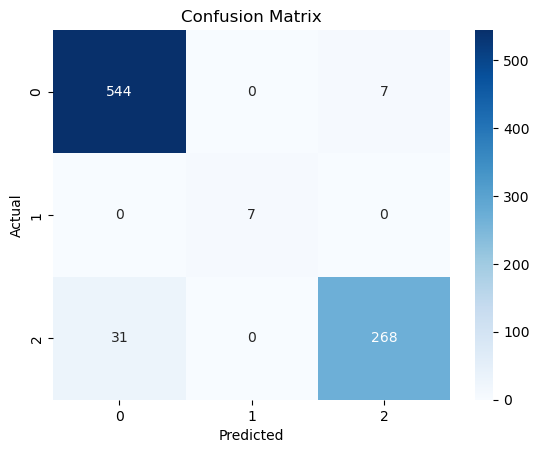

In [3]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Most predictions fall along the diagonal, indicating high accuracy.


Feature Importances:
      Feature  Importance
2  STATIC_BFE    0.469542
3  ABFE_0_2Pc    0.147038
5  Shape_Area    0.143217
4  Shape_Leng    0.123010
1  Join_Count    0.071682
0    GRIDCODE    0.045511


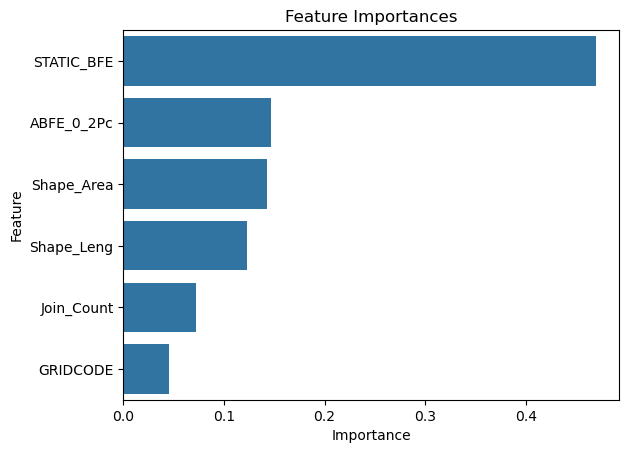

In [4]:
# Step 9: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


### Most important features in flooding:
- STATIC_BFE (Base Flood Elevation): The most critical feature, contributing nearly half the predictive power, aligns with domain knowledge since flood elevation is vital for flood risk assessment.
- ABFE_0_2Pc (Percent Area Affected by Flood): The second most important feature reflects the physical extent of flooding.
- Other features like Shape_Area and Shape_Length are significant but less impactful compared to STATIC_BFE.

### Visualizatio of Geographical data:

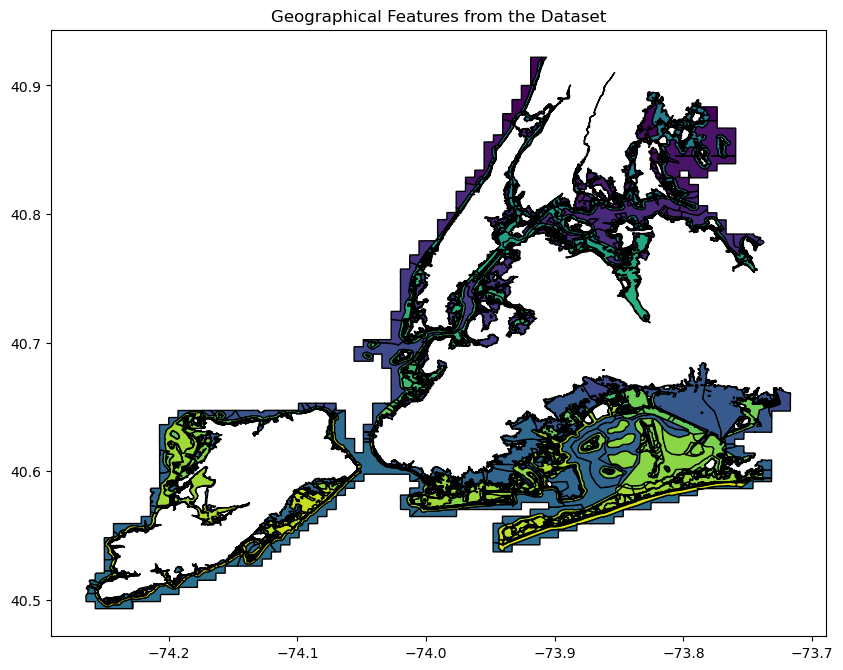

In [6]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

file_path = 'data/nysealevel.csv'
data = pd.read_csv(file_path)

data['geometry'] = data['the_geom'].apply(wkt.loads)  # Convert WKT to geometry

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Plot the data
gdf.plot(figsize=(10, 8), edgecolor='k', cmap='viridis')
plt.title("Geographical Features from the Dataset")
plt.show()

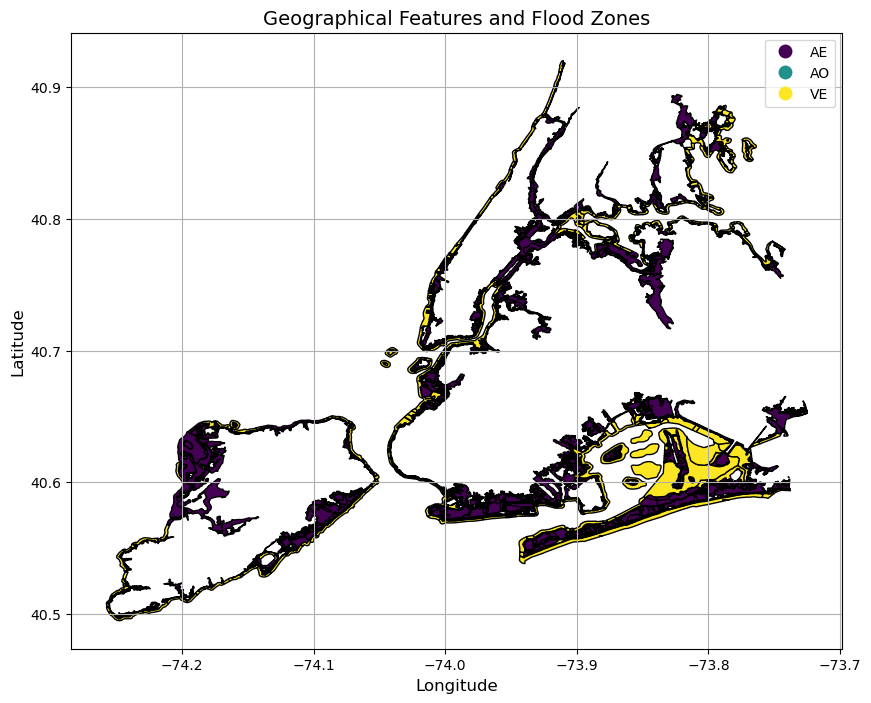

In [9]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/nysealevel.csv'
data = pd.read_csv(file_path)

# Convert the_geom to geometric objects
data['geometry'] = data['the_geom'].apply(wkt.loads)  # Convert WKT to geometry

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Add categorical column for visualization (Example: STATIC_BFE or FLD_ZONE if available)
gdf['Category'] = gdf['FLD_ZONE']  # Replace with appropriate column name

# Plot the data with enhancements
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    ax=ax,
    column='Category',  # Color code by 'Category' column
    cmap='viridis',
    edgecolor='black',
    legend=True  # Add legend without custom label
)

# Add axis labels and title
ax.set_title("Geographical Features and Flood Zones", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.show()


### Interpretation of the legends:

The terms AE, AO, and VE are common flood zone designations used in Flood Insurance Rate Maps (FIRM) created by the Federal Emergency Management Agency (FEMA). These zones provide information about flood risks and are primarily used in floodplain management and flood insurance purposes. Here's what they mean:

| **Zone** | **Flood Depth**             | **Wave Action**        | **BFE Available**          | **Description**                                  |
|----------|-----------------------------|------------------------|----------------------------|-------------------------------------------------|
| **AE**   | >1% chance flood; varies    | No                     | Yes                        | Inland or coastal areas at high flood risk.     |
| **AO**   | 1-3 feet (shallow flooding) | No                     | No (average depths given)  | Areas with sheet flow or ponding.               |
| **VE**   | >1% chance flood; varies    | Yes (wave hazards present) | Yes                     | Coastal high-hazard areas with wave action.     |
